In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(0)

In [3]:
# _URL = ""

# data = tf.keras.utils.get_file(_URL)

In [4]:
data = pd.read_csv('data/combined_data.csv', index_col=0)
data.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,Good case Excellent value.,1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
reviews = data['text'].tolist()

In [6]:
review_labels = data['sentiment'].tolist()


In [7]:
index_of_longest_review = np.argmax([len(rev) for rev in reviews])
print(len(reviews[index_of_longest_review]))
reviews[index_of_longest_review]

743


'As for the "mains also uninspired.\t0\nThis is the place where I first had pho and it was amazing!!\t1\nThis wonderful experience made this place a must-stop whenever we are in town again.\t1\nIf the food isn\'t bad enough for you, then enjoy dealing with the world\'s worst/annoying drunk people.\t0\nVery very fun chef.\t1\nOrdered a double cheeseburger & got a single patty that was falling apart (picture uploaded) Yeah, still sucks.\t0\nGreat place to have a couple drinks and watch any and all sporting events as the walls are covered with TV\'s.\t1\nIf it were possible to give them zero stars, they\'d have it.\t0\nThe descriptions said "yum yum sauce" and another said "eel sauce yet another said "spicy mayo"...well NONE of the rolls had sauces on them.'

In [8]:
##split in test and train

In [9]:
split_index = int(np.ceil(len(reviews)*0.8))

train_reviews = reviews[0:split_index]
test_reviews = reviews[split_index: ]

len(train_reviews), len(test_reviews)

(1594, 398)

In [10]:
train_labels = review_labels[0 : split_index]
test_labels = review_labels[split_index : ]

len(train_labels), len(test_labels)

(1594, 398)

In [11]:
#make numpy arrays
train_labels = np.array(train_labels)
test_labels  = np.array(test_labels)

## Tokenize the reviews

In [12]:
vocab_size = 500
embedding_dim = 16
max_length = 250

In [13]:
tokenizer = Tokenizer(oov_token='<OOV>', num_words=vocab_size)

In [14]:
tokenizer.fit_on_texts(train_reviews)

In [15]:
word_index = tokenizer.word_index
print ('word_index: ' , len(word_index))

word_index:  2834


## Generate Sequence of Reviews

In [16]:
train_sequences = tokenizer.texts_to_sequences(train_reviews)

In [17]:
# train_sequences[0]

In [18]:
train_padded_sequences = pad_sequences(train_sequences, padding='post', maxlen=max_length, truncating='post')
train_padded_sequences[0]

array([ 26,  68,   7,  63, 173,  13,  67,   8, 219,   5,  16,  82,  16,
         2, 198, 364,   4,  75, 109,   6,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [19]:
len(train_padded_sequences[0])

250

In [20]:
train_reviews[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [21]:
train_sequences[0]

[26,
 68,
 7,
 63,
 173,
 13,
 67,
 8,
 219,
 5,
 16,
 82,
 16,
 2,
 198,
 364,
 4,
 75,
 109,
 6,
 1]

In [22]:
# test data

test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded_sequences = pad_sequences(test_sequences, maxlen = max_length, padding='post', truncating='post')

## Create Model

In [23]:
l0 = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length)
# l1 = tf.keras.layers.Flatten()

l1 = tf.keras.layers.GlobalAveragePooling1D()

l2 = tf.keras.layers.Dense(units=6, activation='relu')

l3 = tf.keras.layers.Dense(units=2, activation='softmax')

In [24]:
model = tf.keras.Sequential([l0, l1, l2, l3])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'], optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 8,116
Trainable params: 8,116
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [26]:
EPOCHS = 25
history = model.fit(train_padded_sequences,
          train_labels,
          validation_data=(test_padded_sequences,test_labels),
          epochs=EPOCHS)

Epoch 1/25
50/50 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5220 - val_loss: 0.6991 - val_accuracy: 0.4121
Epoch 2/25
50/50 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5220 - val_loss: 0.7009 - val_accuracy: 0.4121
Epoch 3/25
50/50 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5220 - val_loss: 0.7009 - val_accuracy: 0.4121
Epoch 4/25
50/50 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5220 - val_loss: 0.7001 - val_accuracy: 0.4121
Epoch 5/25
50/50 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5226 - val_loss: 0.7020 - val_accuracy: 0.4121
Epoch 6/25
50/50 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5226 - val_loss: 0.6995 - val_accuracy: 0.4121
Epoch 7/25
50/50 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5226 - val_loss: 0.6968 - val_accuracy: 0.4121
Epoch 8/25
50/50 [==

## Visualize the Network

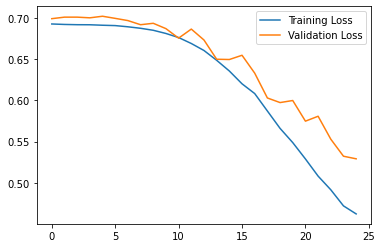

In [27]:
rng = range(0,EPOCHS)
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(rng, loss , label='Training Loss')
plt.plot(rng, val_loss , label='Validation Loss')

plt.legend()
plt.show()

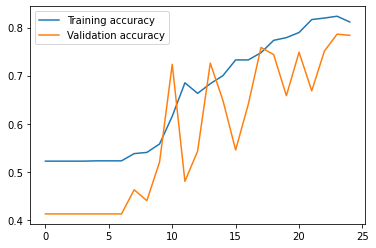

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(rng, accuracy , label='Training accuracy')
plt.plot(rng, val_accuracy , label='Validation accuracy')

plt.legend()
plt.show()

## Visualizing the Network

In [29]:
# tuple_list = [(value, key) for (key, value) in word_index.items()]

# reverse_word_index = dict(tuple_list)

reverse_word_index  = {}
for key, value in word_index.items():
    reverse_word_index[value] = key


In [30]:
embeddig_weights = l0.get_weights()[0]
embeddig_weights.shape

(500, 16)

In [31]:
import io

# embedding vectors and meta-data
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')  # contains weigh vector of each word
out_m = io.open('meta.tsv', 'w', encoding='utf-8') # contain word


In [32]:
#tab delimited 
'\t'.join([str(x) for x in embeddig_weights[1]])

'-0.20052668\t-0.16186894\t-0.156911\t0.21336836\t-0.12704448\t-0.26367295\t-0.038937636\t0.20128827\t0.17940573\t-0.265367\t-0.19682974\t-0.10255213\t0.26033083\t-0.19653033\t0.02780927\t0.14341252'

In [33]:
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embedding = embeddig_weights[word_num]
    
    out_m.write(word+"\n")
    out_v.write('\t'.join([str(x) for x in embeddig_weights[1]]) + "\n")

out_v.close()
out_m.close()

In [34]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

## Predicting Sentiments

In [35]:
fake_reviews =['I love chocolate', 
              'This restaurant sucks',
              'OMG, what a shake!', 
              'Totally recommend this place for grilled sandwitches', 
              'I would lose my license instead of standing in long lines', 
               'please never come to this fish market, it smells too bad']

fake_reviews

['I love chocolate',
 'This restaurant sucks',
 'OMG, what a shake!',
 'Totally recommend this place for grilled sandwitches',
 'I would lose my license instead of standing in long lines',
 'please never come to this fish market, it smells too bad']

In [36]:
fake_seq = tokenizer.texts_to_sequences(fake_reviews)
fake_pad_seq = pad_sequences(fake_seq, maxlen=max_length, padding='post', truncating='post')

In [37]:
classes = model.predict(fake_pad_seq)
            

In [41]:
for i in range(0, len(fake_reviews)):
    print(fake_reviews[i])
    #print(classes[i])
    print('-ve' if np.argmax(classes[i]) == 0 else '+ve')
    print('\n')

I love chocolate
+ve


This restaurant sucks
-ve


OMG, what a shake!
-ve


Totally recommend this place for grilled sandwitches
+ve


I would lose my license instead of standing in long lines
-ve


please never come to this fish market, it smells too bad
-ve


